In [1]:
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Clean_Automobiles_df.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-km/L,highway-km/L,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.94,11.49,13495.0
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000.0,8.94,11.49,16500.0
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000.0,8.09,11.06,16500.0
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500.0,10.21,12.77,13950.0
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500.0,7.66,9.36,17450.0


In [3]:
df.drop(['Unnamed: 0'],inplace=True, axis=1)

In [4]:
df['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.87,0.90,1])

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
87%      19045.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

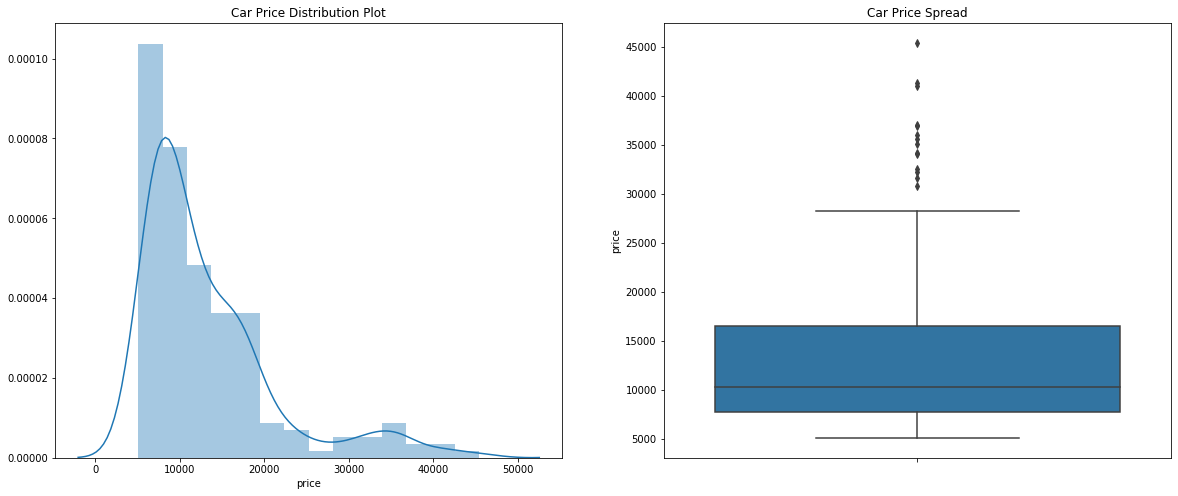

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-km/L,highway-km/L,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330697,3.256965,10.164279,103.402985,5117.661692,10.714428,13.05801,13207.129353
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113747,2.732424,2.89997,7947.066342
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5.530000,6.81000,5118.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,8.090000,10.64000,7775.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.000000,10.210000,12.77000,10295.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.770000,14.47000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,20.850000,22.98000,45400.000000


In [8]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>

<p>Calculate the correlation between variables  of type "int64" or "float64" using the method "corr".<>

In [9]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-km/L,highway-km/L,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.007654,-0.182196,0.075810,0.279739,-0.035522,0.036284,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055299,-0.114713,0.217300,0.239544,-0.225017,-0.181885,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.157851,0.250313,0.371178,-0.360301,-0.470554,-0.543352,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123830,0.159733,0.579795,-0.285973,-0.665153,-0.698283,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188796,0.189867,0.615056,-0.245803,-0.633490,-0.680653,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.061156,0.259737,-0.087001,-0.309971,-0.049762,-0.105016,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167357,0.156433,0.757981,-0.279360,-0.749569,-0.794937,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205549,0.028889,0.822668,-0.256734,-0.650605,-0.679566,0.872335
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,0.566906,-0.267361,-0.582124,-0.591365,0.543155
stroke,-0.007654,0.055299,0.157851,0.123830,0.188796,-0.061156,0.167357,0.205549,-0.055390,1.000000,0.187816,0.098175,-0.063042,-0.034371,-0.034781,0.082262


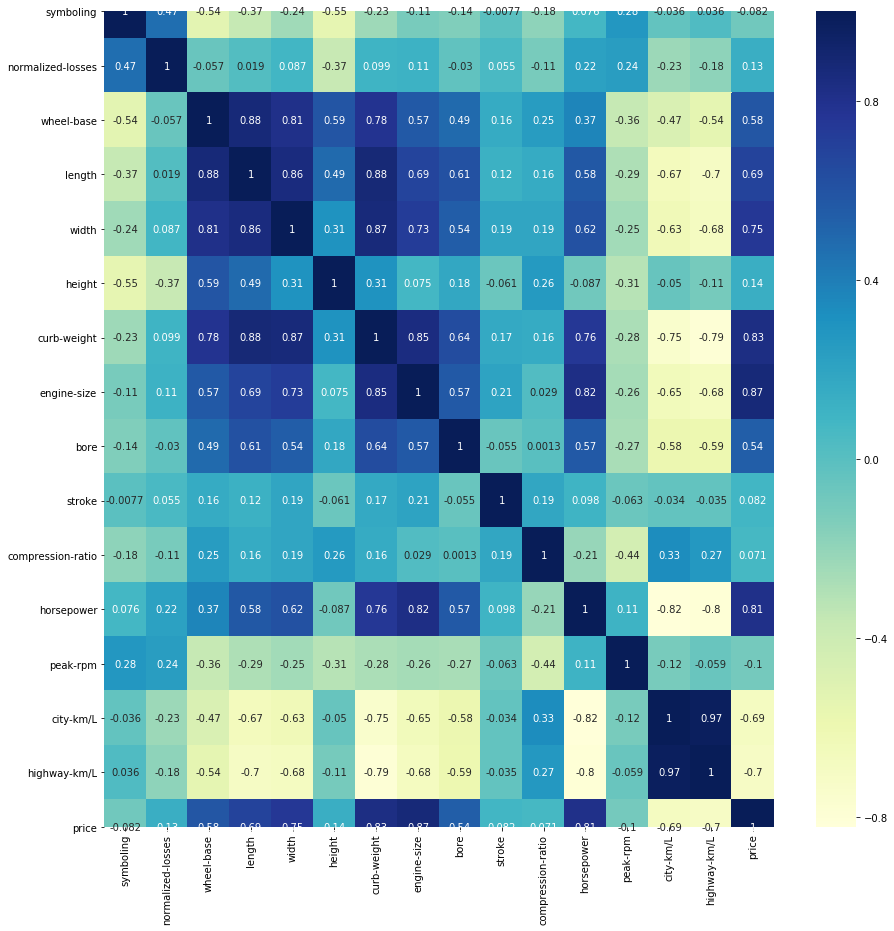

In [10]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<h3>Visualization of realationship between price and Continuous numerical variables</h3>
<p>A good way to visualize Continuous numerical variables is by using scatter plots.</p>

C:\Users\msalm\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


The Pearson Correlation Coefficient is -0.08239118716962357  with a P-value of P = 0.2449148765716521


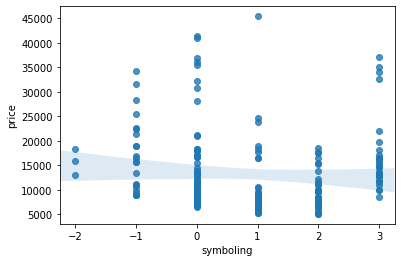

In [11]:
sns.regplot(x="symboling", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>Symboling does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

The Pearson Correlation Coefficient is 0.13399873429274337  with a P-value of P = 0.05789749352703121


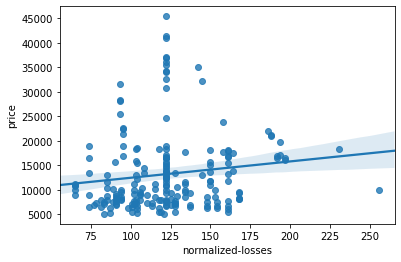

In [12]:
sns.regplot(x="normalized-losses", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['normalized-losses'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the normalized-losses goes up, the price goes up: this indicates a positive direct correlation between these two variables. The normalized-losses seems nearly good predictor of price since the regression line is almost a diagonal line.</p>


The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


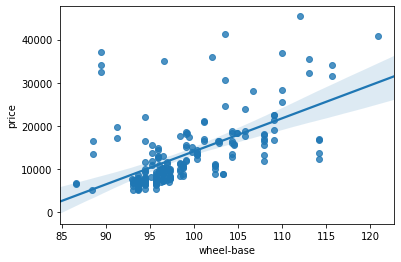

In [13]:
sns.regplot(x="wheel-base", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P = 8.016477466159556e-30


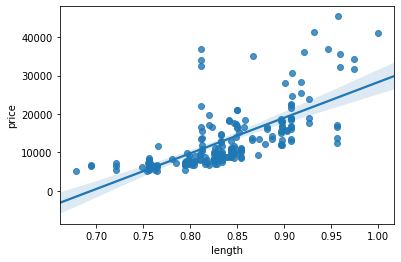

In [14]:
sns.regplot(x="length", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the length goes up, the price goes up: this indicates a positive direct correlation between these two variables. length 
seems nearly good predictor of price since the regression line is almost a diagonal line.</p>


The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


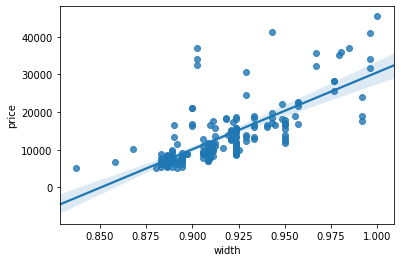

In [15]:
sns.regplot(x="width", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the width goes up, the price goes up: this indicates a positive direct correlation between these two variables. width 
seems nearly good predictor of price since the regression line is almost a diagonal line.</p>


The Pearson Correlation Coefficient is 0.13548630756805996  with a P-value of P = 0.05514627325101262


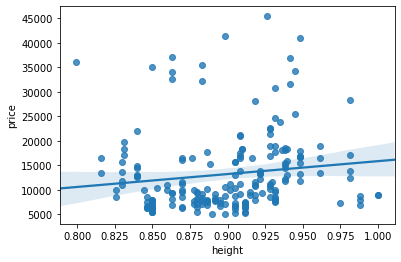

In [16]:
sns.regplot(x="height", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53


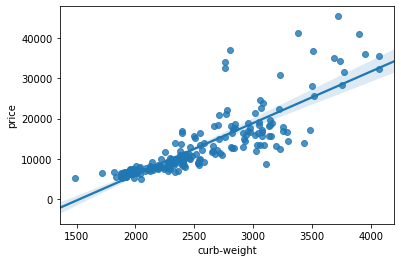

In [17]:
sns.regplot(x="curb-weight", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

 <p>As curb-weight goes up, the price goes up: this indicates a positive direct correlation between these two variables. curb-weight seems very good predictor of price since the regression line is almost a perfect diagonal line.</p>

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


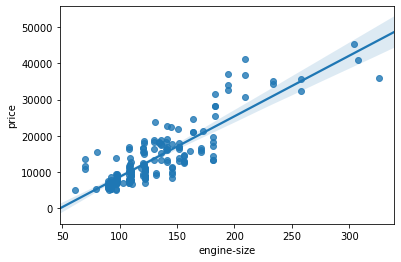

In [18]:
sns.regplot(x="engine-size", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>
<p>The Pearson Correlation Coefficient is approximately 0.87  with a P-value of P = 9.265491622198389e-64.</p>

The Pearson Correlation Coefficient is 0.5431549770315166  with a P-value of P = 8.049696658364992e-17


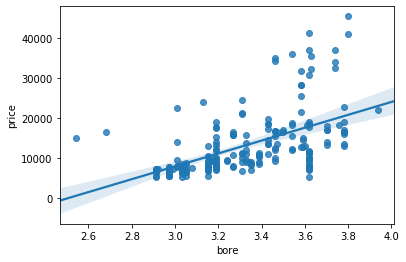

In [19]:
sns.regplot(x="bore", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the bore goes up, the price goes up: this indicates a positive direct correlation between these two variables. Bore seems nearly good predictor of price since the regression line is almost a diagonal line.</p>
<p>The Pearson Correlation Coefficient is approximately 0.54  with a P-value of P = 8.049696658364877e-17.</p>

The Pearson Correlation Coefficient is 0.08226240854477475  with a P-value of P = 0.24565574524206718


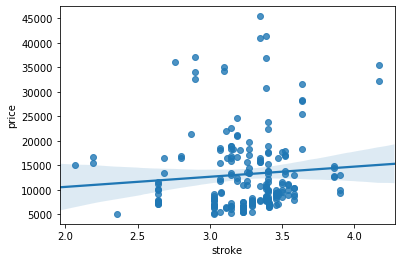

In [20]:
sns.regplot(x="stroke", y="price", data=df )

pearson_coef, p_value = stats.pearsonr(df['stroke'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07110732668194145  with a P-value of P = 0.3158110188729282


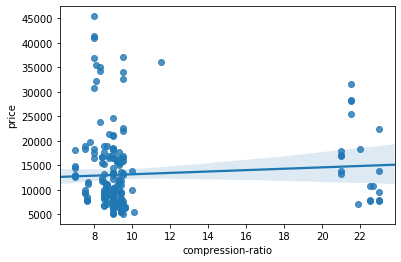

In [21]:
sns.regplot(x="compression-ratio", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['compression-ratio'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


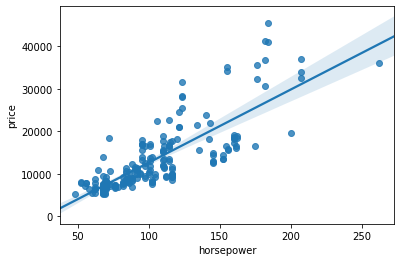

In [22]:
sns.regplot(x="horsepower", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the horsepower goes up, the price goes up: this indicates a positive direct correlation between these two variables. The horsepower seems very good predictor of price since the regression line is almost a perfect diagonal line.</p>
<p>The Pearson Correlation Coefficient is approximately 0.
    81  with a P-value of P = 6.273536270650504e-48.</p>

The Pearson Correlation Coefficient is -0.6866662338043191  with a P-value of P = 2.264382237850252e-29


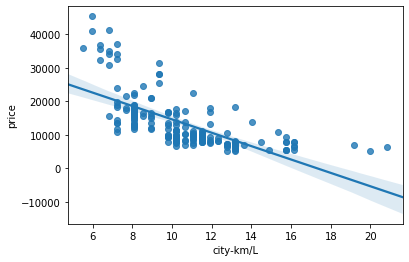

In [23]:
sns.regplot(x="city-km/L", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['city-km/L'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As the city-km/L goes up, the price goes down: this indicates an inverse/negative relationship between these two variables.city-km/L could potentially be a predictor of price.</p>

The Pearson Correlation Coefficient is -0.10161237413760969  with a P-value of P = 0.1511910706670076


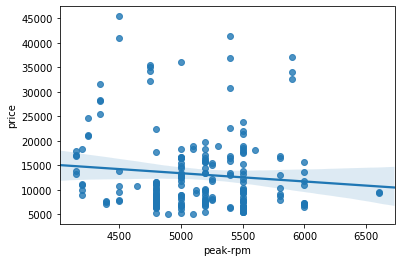

In [24]:
sns.regplot(x="peak-rpm", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['peak-rpm'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7046950040625246  with a P-value of P = 1.7482060498909287e-31


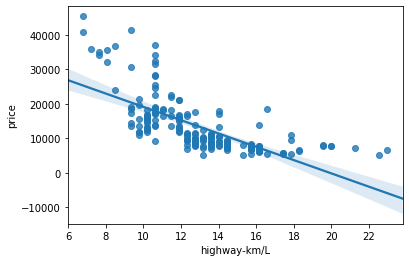

In [25]:
sns.regplot(x="highway-km/L", y="price", data=df )
pearson_coef, p_value = stats.pearsonr(df['highway-km/L'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<p>As we saw in the figure, as the values of<b> wheel-base, length, width, curb-weight, bore, engine_size and horsepower</b> goes up, the price goes down: this indicates a<b> positive direct correlation</b> between these two variables. So, these are seems like a pretty good predictor of price since the regression line of these values are almost a perfect diagonal line.</p>

<h3>Visualization of realationship between price and Categorical variables</h3>

<p>A good way to visualize categorical variables is by using boxplots</p>


|     Atributes       |  Pearson Correlation Coefficient   |            P-valu         |
|---------------------|------------------------------------|---------------------------|
|     wheel-base      |        0.58                        |       8.07 e-20           |
|---------------------|------------------------------------|---------------------------|
|     length          |        0.69                        |       8.01 e-30           |
|---------------------|------------------------------------|---------------------------|
|     width           |        0.75                        |       9.20 e-38           |
|---------------------|------------------------------------|---------------------------|
|     curb-weight     |        0.83                        |       2.19 e-53           |
|---------------------|------------------------------------|---------------------------|
|     bore            |        0.54                        |       8.05 e-17           |
|---------------------|------------------------------------|---------------------------|
|     Engine-size     |        0.87                        |       9.26 e-64           |
|---------------------|------------------------------------|---------------------------|
|     Horsepower      |        0.80                        |       6.27 e-48           |
|---------------------|------------------------------------|---------------------------|
|     city-km/L       |       -0.69                        |       2.26 e-29           |
|---------------------|------------------------------------|---------------------------|
|     highway-km/L    |       -0.70                        |       1.74 e-31           |
|---------------------|------------------------------------|---------------------------|
|     symboling       |       -0.082                       |       0.240               |
|---------------------|------------------------------------|---------------------------|
|   normalized-losses |        0.13                        |       0.057               |
|---------------------|------------------------------------|---------------------------|
|      height         |        0.14                        |       0.055               |
|---------------------|------------------------------------|---------------------------|
|      stroke         |        0.082                       |       0.245               |
|---------------------|------------------------------------|---------------------------|
|   compression-ratio |        0.071                       |       0.315               |
|---------------------|------------------------------------|---------------------------|
|      peak_rpm       |       -0.101                       |       0.151               |
|---------------------|------------------------------------|---------------------------|


    <p>As we saw in the figure, as the values of<b> wheel-base, length, width, curb-weight, bore, engine_size and horsepower</b> goes up, the price goes down: this indicates a<b> positive direct correlation</b> between these two variables. Their  So, these are seems like a pretty good predictor of price since the regression line of these values are almost a perfect diagonal line.</p>

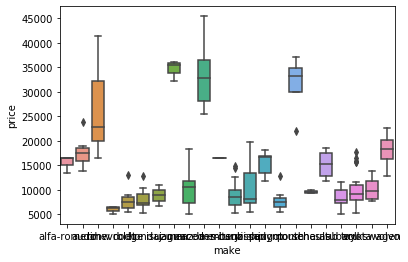

In [26]:
sns.boxplot(x="make", y="price", data=df)
d=df["make"].value_counts()

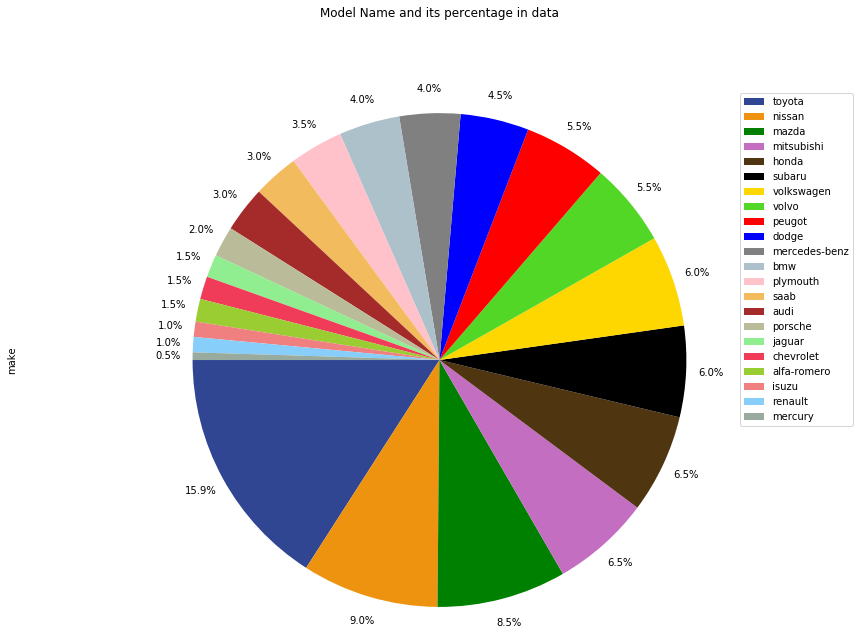

In [27]:
colors_list = ['#304692','#EE9310','green','#C46EC2','#503511','black','gold','#52D726','red' ,'blue', 'gray','#ACC1CA','#FFC1CA','#F2BC5E','Brown','#BABC99','lightgreen','#F13C59','yellowgreen', 'lightcoral', 'lightskyblue','#99AA9E']
explode_list = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d.plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                           # explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Model Name and its percentage in data', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d.index, loc='upper right') 

plt.show()

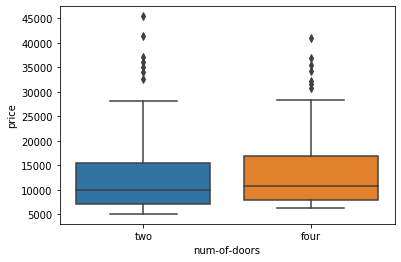

In [28]:
sns.boxplot(x="num-of-doors", y="price", data=df)
d_num_of_door=df["num-of-doors"].value_counts()

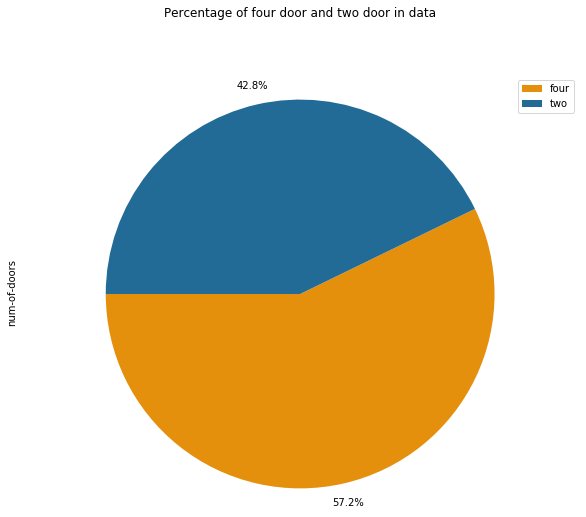

In [29]:
colors_list = ['#E5900D','#216B96']
explode_list = [0.1,0] # ratio for each continent with which to offset each wedge.

d_num_of_door.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Percentage of four door and two door in data', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_num_of_door.index, loc='upper right') 

plt.show()

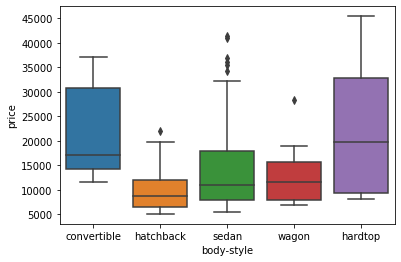

In [30]:
sns.boxplot(x="body-style", y="price", data=df)
d_body_style=df["body-style"].value_counts()

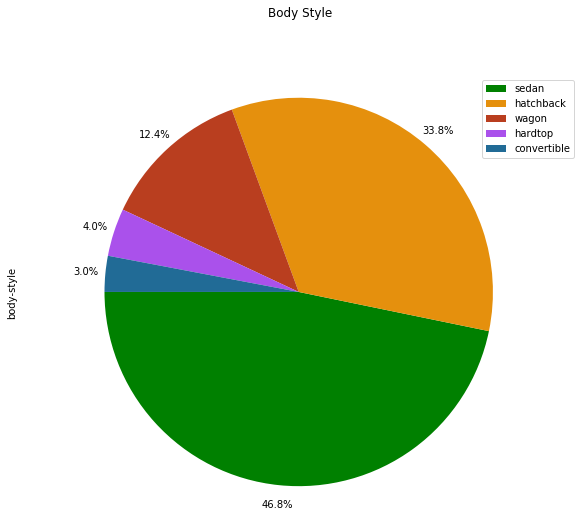

In [31]:
colors_list = ['green', '#E5900D','#B93E1F','#AA51EB','#216B96']
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_body_style.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Body Style', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_body_style.index, loc='upper right') 

plt.show()

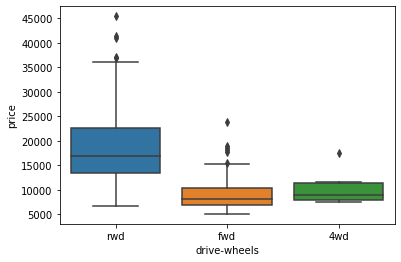

In [32]:
sns.boxplot(x="drive-wheels", y="price", data=df)
d_drive_wheels=df["drive-wheels"].value_counts()

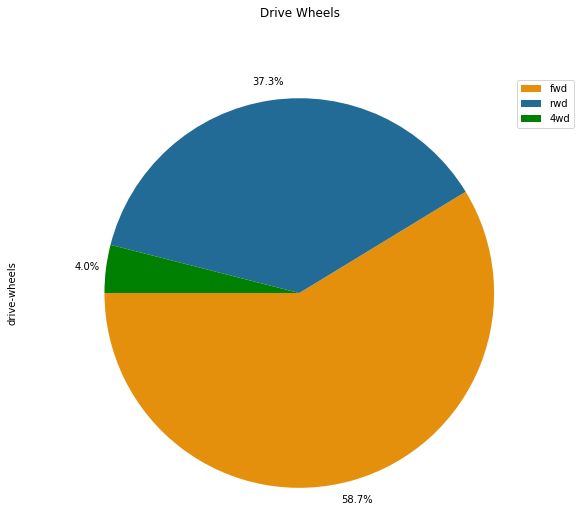

In [33]:
colors_list = [ '#E5900D','#216B96','green' ]
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_drive_wheels.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Drive Wheels', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_drive_wheels.index, loc='upper right') 

plt.show()

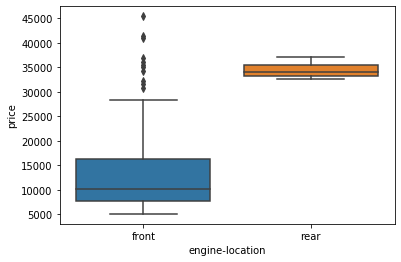

In [34]:
sns.boxplot(x="engine-location", y="price", data=df)
d_engine_location=df["engine-location"].value_counts()

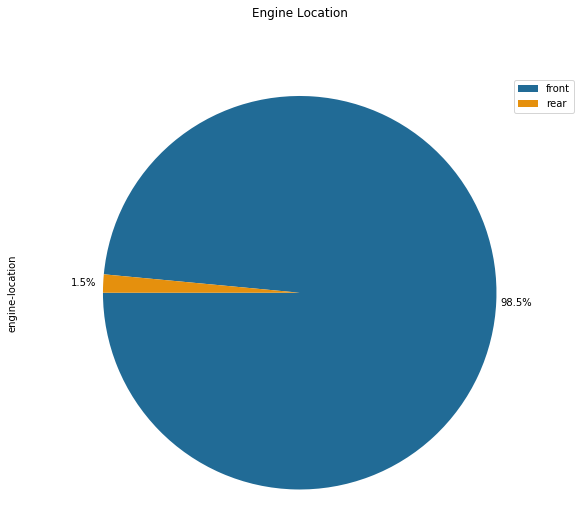

In [35]:
colors_list = ['#216B96', '#E5900D']
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_engine_location.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Engine Location', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_engine_location.index, loc='upper right') 

plt.show()

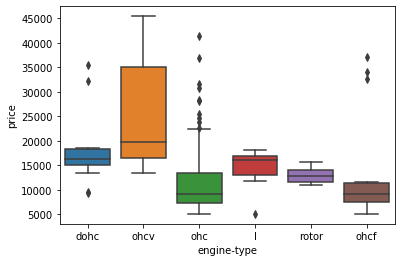

In [36]:
sns.boxplot(x="engine-type", y="price", data=df)
d_engine_type=df["engine-type"].value_counts()

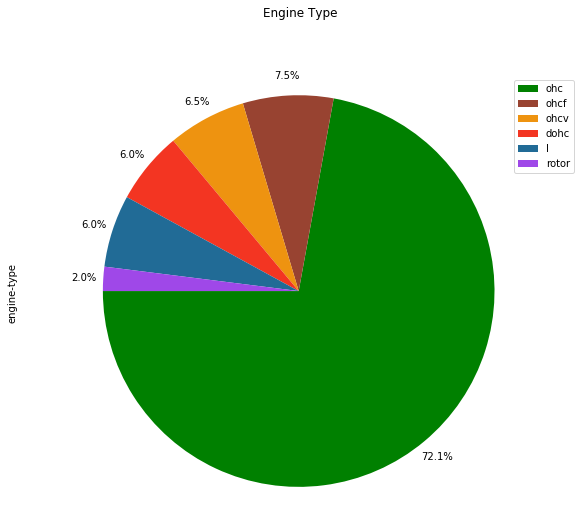

In [37]:
colors_list = ['green','#984331','#EE9310','#F33522','#216B96','#9F48E8','yellowgreen','Brown','orange' ]
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_engine_type.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Engine Type', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_engine_type.index, loc='upper right') 

plt.show()

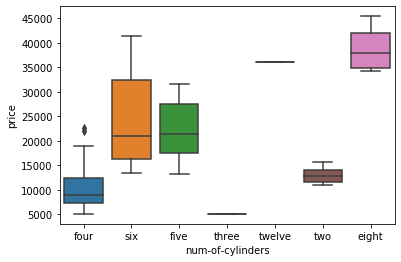

In [38]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)
d_num_of_cylinders=df["num-of-cylinders"].value_counts()

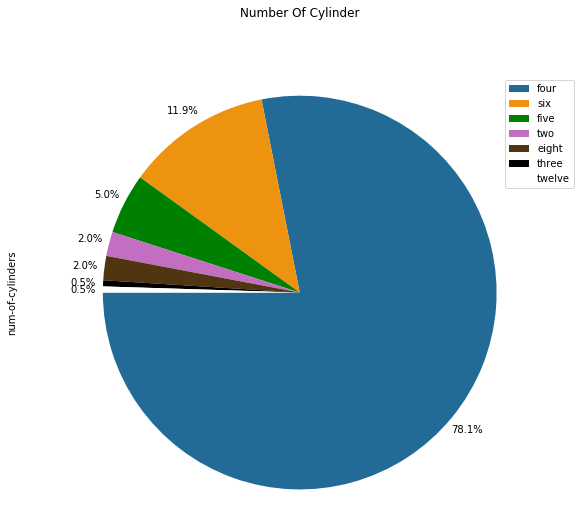

In [39]:
colors_list = ['#216B96','#EE9310','green','#C46EC2','#503511','black','white' ]
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_num_of_cylinders.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Number Of Cylinder', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_num_of_cylinders.index, loc='upper right') 

plt.show()

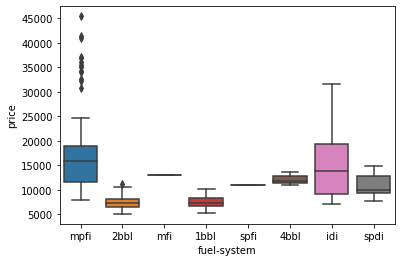

In [40]:
sns.boxplot(x="fuel-system", y="price", data=df)
d_fuel_system=df["fuel-system"].value_counts()

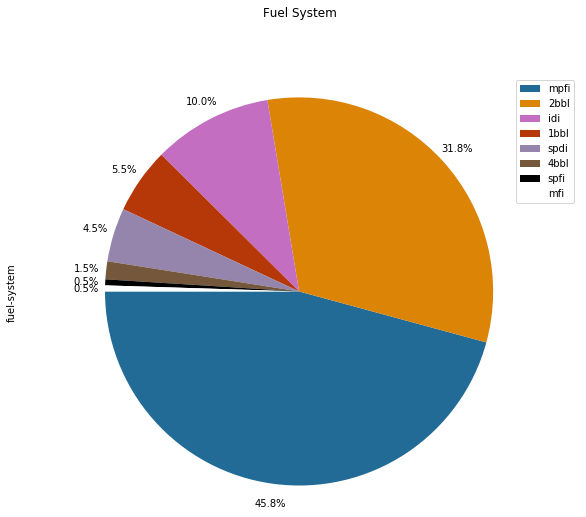

In [41]:
colors_list = ['#216B96','#DC8405','#C46EC2','#B63707','#9585AC' ,'#75583B','black','white']
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_fuel_system.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Fuel System', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_fuel_system.index, loc='upper right') 

plt.show()

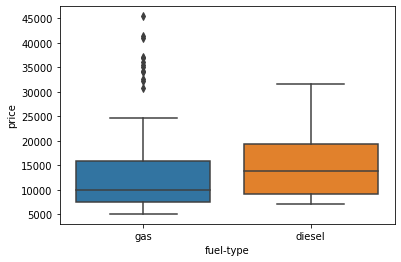

In [42]:
sns.boxplot(x="fuel-type", y="price", data=df)
d_fuel_type=df["fuel-type"].value_counts()

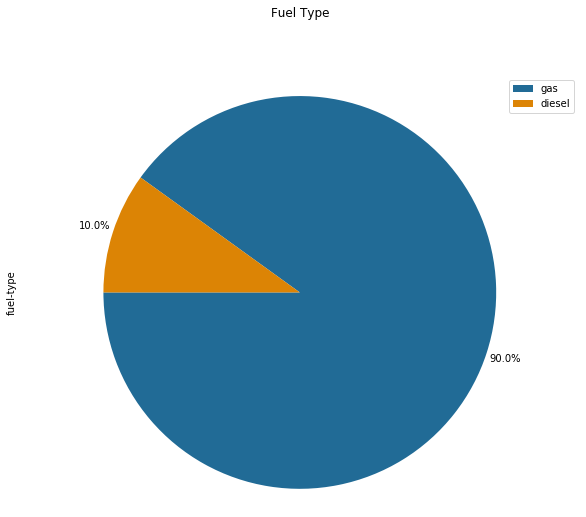

In [43]:
colors_list = ['#216B96','#DC8405','#C46EC2','#B63707','#9585AC' ,'#75583B','black','white']
explode_list = [0,0,0,0,0.1] # ratio for each continent with which to offset each wedge.

d_fuel_type.plot(kind='pie',
                            figsize=(10, 8),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Fuel Type', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=d_fuel_type.index, loc='upper right') 

plt.show()

In [44]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

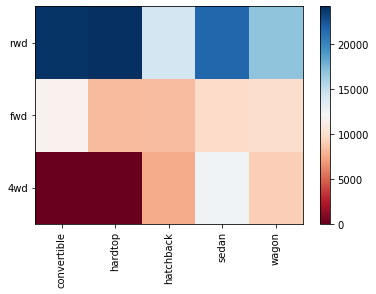

In [45]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [46]:


# grouping results
df_gptest = df[['drive-wheels','engine-location','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','engine-location'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='engine-location',columns='drive-wheels')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                           
drive-wheels         4wd          fwd           rwd
engine-location                                    
front            10241.0  9244.779661  19142.180556
rear                 0.0     0.000000  34528.000000

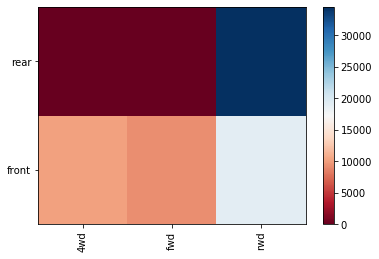

In [47]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [48]:
# grouping results
df_gptest = df[['drive-wheels','num-of-cylinders','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','num-of-cylinders'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='num-of-cylinders',columns='drive-wheels')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                            
drive-wheels               4wd           fwd           rwd
num-of-cylinders                                          
eight                 0.000000      0.000000  38900.000000
five              17450.000000  17810.000000  28394.000000
four               9211.142857   8764.091743  14581.414634
six                   0.000000  13799.000000  25082.238095
three                 0.000000   5151.000000      0.000000
twelve                0.000000      0.000000  36000.000000
two                   0.000000      0.000000  13020.000000

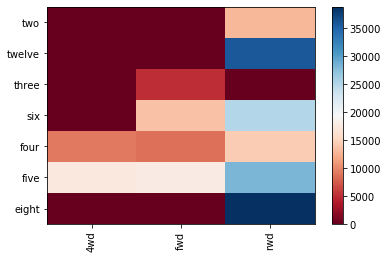

In [49]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [50]:
# grouping results
df_gptest = df[['drive-wheels','engine-type','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','engine-type'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='engine-type',columns='drive-wheels')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                            
drive-wheels           4wd           fwd           rwd
engine-type                                           
dohc              0.000000  18385.000000  18062.700000
l                 0.000000   5151.000000  15489.090909
ohc           11375.333333   9074.980952  18655.891892
ohcf           9560.400000   7813.285714  34528.000000
ohcv              0.000000  13799.000000  28488.200000
rotor             0.000000      0.000000  13020.000000

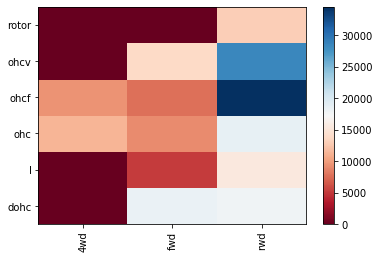

In [51]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [52]:
# grouping results
df_gptest = df[['drive-wheels','fuel-type','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','fuel-type'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='fuel-type',columns='drive-wheels')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                           
drive-wheels      4wd          fwd           rwd
fuel-type                                       
diesel            0.0  9265.333333  21215.909091
gas           10241.0  9243.082569  19506.968750

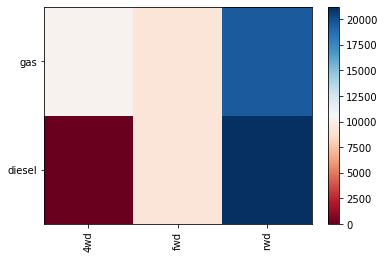

In [53]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [54]:
# grouping results
df_gptest = df[['body-style','engine-location','price']]
grouped_test1 = df_gptest.groupby(['body-style','engine-location'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='body-style',columns='engine-location')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price         
engine-location         front     rear
body-style                            
convertible      18863.000000  37028.0
hardtop          18518.666667  33278.0
hatchback         9957.441176      0.0
sedan            14459.755319      0.0
wagon            12371.960000      0.0

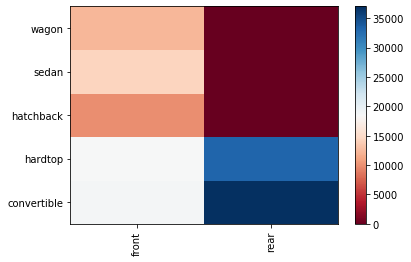

In [55]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [56]:
# grouping results
df_gptest = df[['engine-type','engine-location','price']]
grouped_test1 = df_gptest.groupby(['engine-type','engine-location'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='engine-type',columns='engine-location')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price         
engine-location         front     rear
engine-type                           
dohc             18116.416667      0.0
l                14627.583333      0.0
ohc              11567.358621      0.0
ohcf              8541.250000  34528.0
ohcv             25098.384615      0.0
rotor            13020.000000      0.0

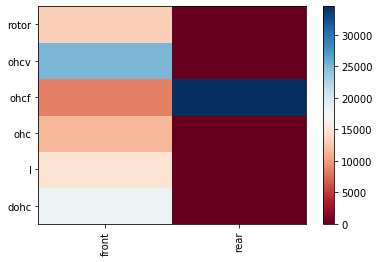

In [57]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [58]:
# grouping results
df_gptest = df[['num-of-cylinders','engine-location','price']]
grouped_test1 = df_gptest.groupby(['num-of-cylinders','engine-location'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='num-of-cylinders',columns='engine-location')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price         
engine-location          front     rear
num-of-cylinders                       
eight             38900.000000      0.0
five              22007.600000      0.0
four              10303.197452      0.0
six               22120.952381  34528.0
three              5151.000000      0.0
twelve            36000.000000      0.0
two               13020.000000      0.0

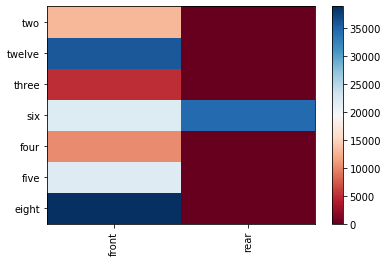

In [59]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [60]:
# grouping results
df_gptest = df[['fuel-system','engine-location','price']]
grouped_test1 = df_gptest.groupby(['fuel-system','engine-location'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='fuel-system',columns='engine-location')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price         
engine-location         front     rear
fuel-system                           
1bbl              7555.545455      0.0
2bbl              7433.203125      0.0
4bbl             12145.000000      0.0
idi              15838.150000      0.0
mfi              12964.000000      0.0
mpfi             17034.707865  34528.0
spdi             10990.444444      0.0
spfi             11048.000000      0.0

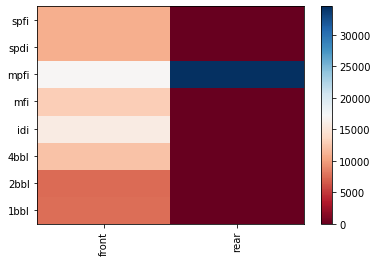

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [62]:
# grouping results
df_gptest = df[['engine-location','fuel-type','price']]
grouped_test1 = df_gptest.groupby(['engine-location','fuel-type'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='fuel-type',columns='engine-location')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price         
engine-location         front     rear
fuel-type                             
diesel           15838.150000      0.0
gas              12552.168539  34528.0

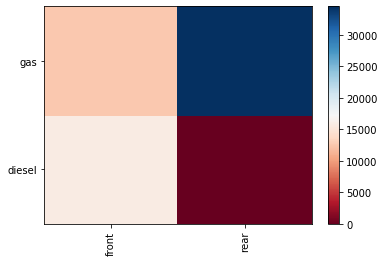

In [63]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


<h2 id="identify_handle_missing_values"><u>4.3 Indicator variable (or dummy variable)</u></h2>
    <p>We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables. Similarly, "aspiration" column also has two unique values, "std" and "turbo", so convert it also into indicator variables.</p>


In [65]:
dummy_variable_1 = pd.get_dummies(df["drive-wheels"]) 
dummy_variable_1.rename(columns={'rwd':'rear-wheel drive','4wd':'four-wheel drive','fwd':'front-wheel drive'}, inplace=True)
#dummy_variable_2 =pd.get_dummies(df['engine-location'])
#asp.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
#df.drop(["fuel-type"], axis = 1, inplace=True)
#df.drop(['aspiration'], axis = 1, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

In [66]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-km/L,highway-km/L,price,four-wheel drive,front-wheel drive,rear-wheel drive
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,8.94,11.49,13495.0,0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,8.94,11.49,16500.0,0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,8.09,11.06,16500.0,0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,10.21,12.77,13950.0,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,7.66,9.36,17450.0,1,0,0


In [68]:
df.to_csv('Clean_Automobiles_model_df.csv')